# Practicing Linear Regression

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Import Dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')

## YData Profiling

In [3]:
from ydata_profiling import ProfileReport

report_filename = "profile_report.html"

if os.path.exists(report_filename):
    print(f"Report '{report_filename}' already exists. Skipping generation.")
else:
    pr = ProfileReport(df, title="Profile Report", explorative=True)
    pr.to_file(report_filename)
    print(f"Report saved as '{report_filename}'. You can open it in a browser.")

Report 'profile_report.html' already exists. Skipping generation.


## Removing empty rows

In [4]:
df_cleaned = df.dropna(how='all')
X = df_cleaned.iloc[:, 4].values
y = df_cleaned.iloc[:, -1].values

## Imputing missing values

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = (imputer.fit_transform(X.reshape(-1, 1))).flatten()
y = (imputer.fit_transform(y.reshape(-1, 1))).flatten()

## Splitting dataset into Training Set and Test Set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

## Predicting test set result

In [8]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

## Visualising the training set results

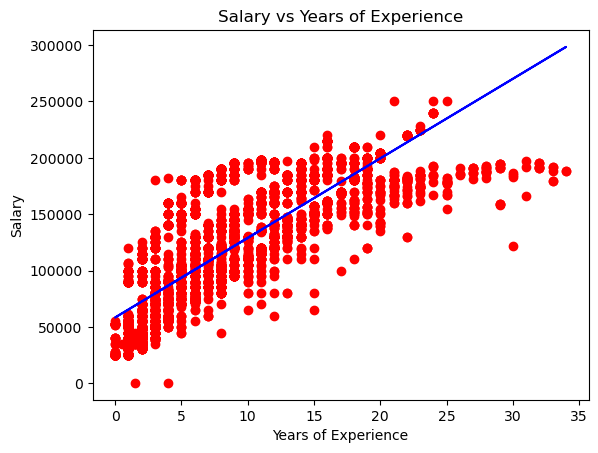

In [9]:
%matplotlib inline
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1, 1)), color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


## Visualising the test set results

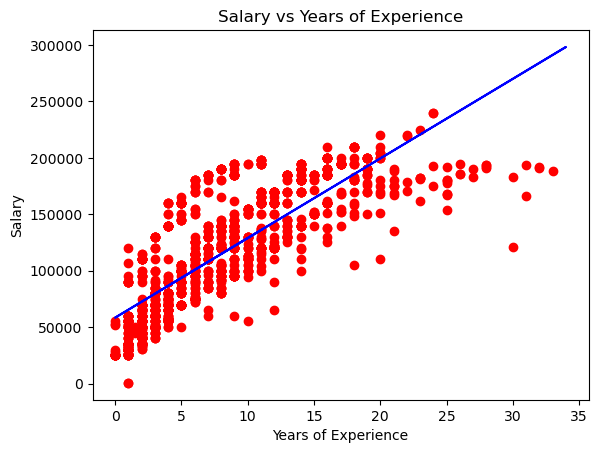

In [10]:
%matplotlib inline
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1, 1)), color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()